# Video

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data

x = [1, 2, 2, 3, 4, 4, 5, 6]
y = [2, 3, 4, 4, 4, 6, 5, 7]

data_dict = {"x": x,
             "y": y}

df = pd.DataFrame(data_dict)
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [3]:
df['xy'] = df['x'] * df['y']
df['x^2'] = df['x']**2
df.loc['sum'] = df.sum(axis=0)
df

,x,y,xy,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
sum,27,35,135,111


In [4]:
sum_row = df.loc['sum']
n = len(df)-1
m = (n*sum_row['xy'] - sum_row['x']*sum_row['y'])/(n*sum_row['x^2'] - sum_row['x']**2)
b = np.mean(df.loc[:7, 'y']) - m*np.mean(df.loc[:7, 'x'])

print(m, b)

0.8490566037735849 1.5094339622641506


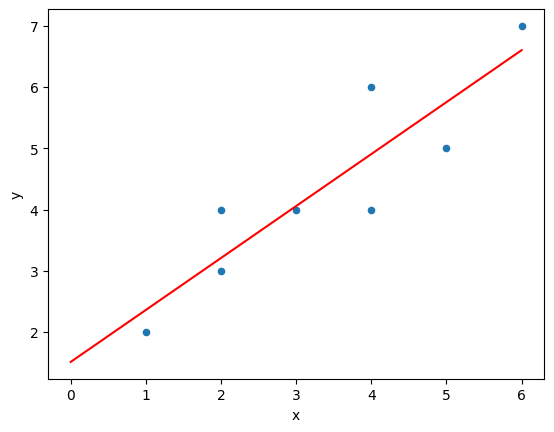

In [5]:
#Removing sum row now that it isn't longer necessary so indexing the required values is easier.

df.drop('sum', inplace=True)

#Plotting the points using df.plot.scatter

df.plot.scatter('x', 'y')

#Plotting the regression line using df.plot.line
plt.plot([0, 6], [b, m*6 + b], color='red')

In [6]:
#We add a row with predicted y
df['pred_y'] = df['x']*m + b

#We add a row with the error for each point
df['error'] = df['y'] - df['pred_y']
df['error^2'] = df['error']**2

print(f"RSS(Residual sum of squares) = {df['error^2'].sum()}")
print(f"MAE(Mean square error) = {df['error^2'].sum()/8}")
print(f"RMSE(Root mean square error) = {np.sqrt(df['error^2'].sum()/8)}")
print(f"MAE(Mean absolute error) = {np.absolute(df['error']).sum()/8}")
df


RSS(Residual sum of squares) = 3.5471698113207544
MAE(Mean square error) = 0.4433962264150943
RMSE(Root mean square error) = 0.6658800390574073
MAE(Mean absolute error) = 0.570754716981132


,x,y,xy,x^2,pred_y,error,error^2
0,1,2,2,1,2.358491,-0.358491,0.128515
1,2,3,6,4,3.207547,-0.207547,0.043076
2,2,4,8,4,3.207547,0.792453,0.627981
3,3,4,12,9,4.056604,-0.056604,0.003204
4,4,4,16,16,4.905660,-0.905660,0.820221
5,4,6,24,16,4.905660,1.094340,1.197579
6,5,5,25,25,5.754717,-0.754717,0.569598
7,6,7,42,36,6.603774,0.396226,0.156995


<Axes: ylabel='Frequency'>

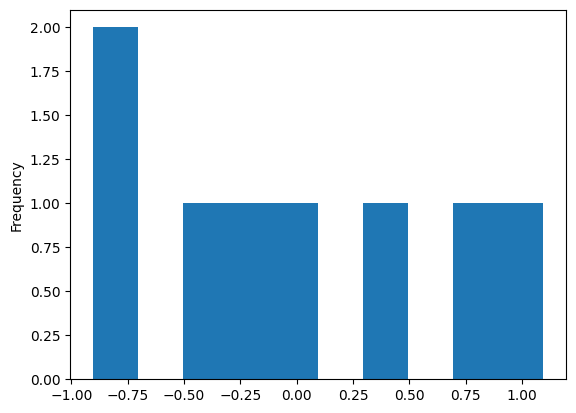

In [7]:
#Error histogram
df['error'].plot.hist()


# Regresión Lineal Simple y Múltiple








32.819339789539896 3116.083974367386


,inversion,ventas,xy,x^2
0,5000,160000,800000000,25000000
1,5570,189380,1054846600,31024900
2,4350,139200,605520000,18922500
3,7900,260700,2059530000,62410000
4,6800,217600,1479680000,46240000
5,5400,183600,991440000,29160000
6,6900,234600,1618740000,47610000
7,3900,136500,532350000,15210000
8,4200,138600,582120000,17640000
9,5780,202300,1169294000,33408400


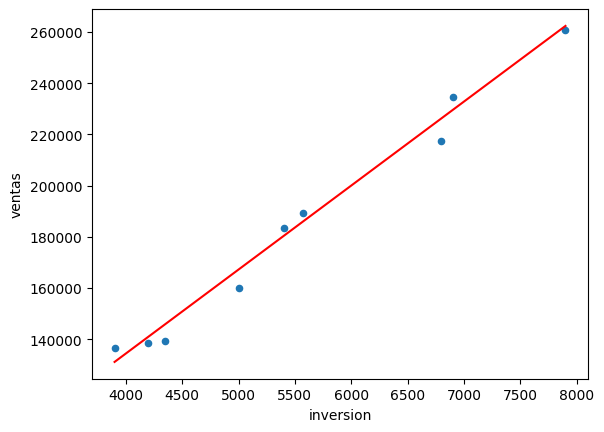

In [8]:
#Regresión Linear Simple

inversion = [5000, 5570, 4350, 7900, 6800, 5400, 6900, 3900, 4200, 5780]
ventas = [160000, 189380, 139200, 260700, 217600, 183600, 234600, 136500, 138600, 202300]

data_dict = {"inversion": inversion,
             "ventas": ventas}

df = pd.DataFrame(data_dict)

df['xy'] = df['inversion'] * df['ventas']
df['x^2'] = df['inversion']**2
df.loc['sum'] = df.sum(axis=0)

sum_row = df.loc['sum']
n = len(df)-1
m = (n*sum_row['xy'] - sum_row['inversion']*sum_row['ventas'])/(n*sum_row['x^2'] - sum_row['inversion']**2)

b = np.mean(df.loc[:9, 'ventas']) - m*np.mean(df.loc[:9, 'inversion'])

print(m, b)

ax = df[:9].plot.scatter('inversion', 'ventas')
plt.plot([3900, 7900], [3900*m + b, 7900*m + b], color='red')
df

In [9]:
#Regresion linear multiple

#Function to check if X'X is reversible or not:
def check_if_inversible(matrix):
    #If the determinant of the product of X and X transposed is different from zero return true
    return np.linalg.det(matrix) != 0

#Dictionary to create a DF later
data_dict = {'y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4],
           'X1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
           'X2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
           'X3': [6, 15, 8, 8, 6, 9 ,17, 22, 18, 4, 23, 9, 8],
           'X4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12 ,12]}

matriz_X = np.array([[1, 7, 26, 6, 60],
                     [1, 1, 29, 15, 52],
                     [1, 11, 56, 8, 20],
                     [1, 11, 31, 8, 47],
                     [1, 7, 52, 6, 33],
                     [1, 11, 55, 9, 22],
                     [1, 3, 71, 17, 6],
                     [1, 1, 31, 22, 44],
                     [1, 2, 54, 18, 22],
                     [1, 21, 47, 4, 26],
                     [1, 1, 40, 23, 34],
                     [1, 11, 66, 9, 12],
                     [1, 10, 68, 8, 12]])

Xt= matriz_X.transpose()

matriz_y = np.array([[78.5], [74.3], [104.3], [87.6], [95.9], [109.2], [102.7], [72.5], [93.1], [115.9], [83.8], [113.3], [109.4]])

#Multiply X by X transposed
XtX = np.dot(Xt, matriz_X)
print(XtX)

if check_if_inversible(XtX):
    #Invert the resulting matrix
    XtX_inv = np.linalg.inv(XtX)
    print(XtX_inv)
else:
    XtX_inv = np.linalg.pinv(XtX)
    print(XtX_inv)

#Calculating betas by multiplying the inverted matrix by Xt and Y
betas = np.dot(np.dot(XtX_inv, Xt), matriz_y)
print(betas)

[[   13    97   626   153   390]
 [   97  1139  4922   769  2620]
 [  626  4922 33050  7201 15739]
 [  153   769  7201  2293  4628]
 [  390  2620 15739  4628 15062]]
[[ 8.20654575e+02 -8.44180186e+00 -8.45777985e+00 -8.63453878e+00
  -8.28974378e+00]
 [-8.44180186e+00  9.27104019e-02  8.56862094e-02  9.26373566e-02
   8.44549553e-02]
 [-8.45777985e+00  8.56862094e-02  8.75602572e-02  8.78666397e-02
   8.55980995e-02]
 [-8.63453878e+00  9.26373566e-02  8.78666397e-02  9.52014097e-02
   8.63919188e-02]
 [-8.28974378e+00  8.44549553e-02  8.55980995e-02  8.63919188e-02
   8.40311912e-02]]
[[62.4053693 ]
 [ 1.55110265]
 [ 0.51016758]
 [ 0.1019094 ]
 [-0.14406103]]


# Tarea: Realizar una regresión linear individual y multiple con un dataset propio

In [10]:
#Data generated by ChatGPT
#The variables in the DF will be age(years), experience(years), salary(USD) and education (1: High School, 2: Bachelor's, 3: Master's, 4: PhD)

data_dict = {"age": [25, 45, 30, 35, 50, 23, 32, 40, 48, 37, 29, 42, 46, 28, 22, 55, 25, 45, 30, 35, 50, 23, 32, 40, 48, 37, 29, 42, 46, 28, 22, 55, 25, 45, 30, 35, 50, 23, 32, 40, 48, 37, 29, 42, 46],
             "experience": [3, 12, 5, 8, 15, 2, 7, 10, 14, 9, 6, 11, 13, 4, 1, 16, 3, 12, 5, 8, 15, 2, 7, 10, 14, 9, 6, 11, 13, 4, 1, 16, 3, 12, 5, 8, 15, 2, 7, 10, 14, 9, 6, 11, 13],
             "education": [2, 3, 2, 3, 4, 1, 2, 3, 4, 3, 2, 3, 4, 2, 1, 4, 2, 3, 2, 3, 4, 1, 2, 3, 4, 3, 2, 3, 4, 2, 1, 4, 2, 3, 2, 3, 4, 1, 2, 3, 4, 3, 2, 3, 4],
             "salary": [40000, 85000, 50000, 65000, 110000, 35000, 48000, 72000, 105000, 68000, 52000, 80000, 98000, 47000, 33000, 120000, 40000, 85000, 50000, 65000, 110000, 35000, 48000, 72000, 105000, 68000, 52000, 80000, 98000, 47000, 33000, 120000, 40000, 85000, 50000, 65000, 110000, 35000, 48000, 72000, 105000, 68000, 52000, 80000, 98000]

}

df = pd.DataFrame(data_dict)
df.head()

,age,experience,education,salary
0,25,3,2,40000
1,45,12,3,85000
2,30,5,2,50000
3,35,8,3,65000
4,50,15,4,110000


0.9664042846462705


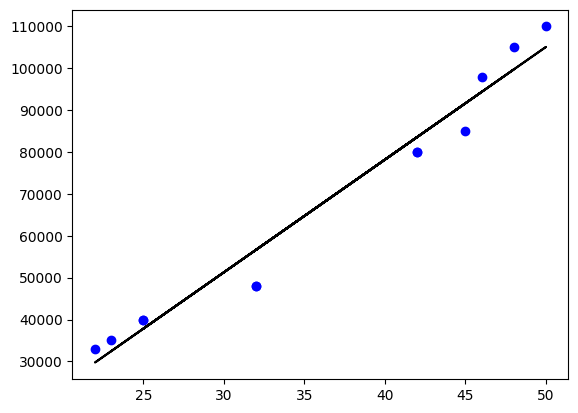

(array([2., 1., 0., 2., 0., 0., 0., 2., 3., 2.]),
 array([-8660.15971606, -7266.96666244, -5873.77360882, -4480.5805552 ,
        -3087.38750158, -1694.19444797,  -301.00139435,  1092.19165927,
         2485.38471289,  3878.57776651,  5271.77082013]),
 <BarContainer object of 10 artists>)

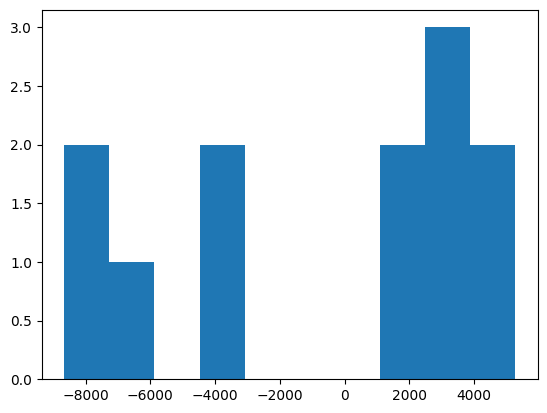

In [11]:
#Simple linear regression

from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Creating new DF with only two columns to perform a simple linear regression
df_linear = df[['age', 'salary']]

#Splitting the data into dependent and independent variables
X= np.array(df_linear['age']).reshape(-1, 1)
y= np.array(df_linear['salary']).reshape(-1, 1)


#Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)


y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

#Plot an histogram of the error
error = y_test - y_pred
plt.hist(error)

In [13]:
#Calculating regression metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 4594.271559555503
MSE: 25968554.7541175
RMSE: 5095.935120673879


In [15]:
#Linear regression with all the variables

#Creating feature variables

X = df[['age', 'experience', 'education']]
y = df['salary']

#Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# creating a regression model
model = LinearRegression()


# fitting the model
model.fit(X_train,y_train)

#Making predictions
y_pred = model.predict(X_test)

#Calculating regression metrics
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 4223.214316023057
MSE: 21817726.481735457
RMSE: 4670.944923860209
